In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data0=pd.read_csv('HEPData1.csv')

In [3]:
SingleTop=data0.iloc[13:25].reset_index()
VV=data0.iloc[26:38].reset_index()
W=data0.iloc[39:51].reset_index()
tbar=data0.iloc[52:64].reset_index()
QCD=data0.iloc[65:77].reset_index()
chi1=data0.iloc[78:90].reset_index()
chi2=data0.iloc[91:103].reset_index()
Tdata=data0.iloc[104:116].reset_index()
Z=data0.iloc[0:12].reset_index()


In [4]:
data=pd.DataFrame()

In [5]:
data['Mass']=Z.iloc[:,1]
data['Z+jets']=Z.iloc[:,2]
data['Single top']=SingleTop.iloc[:,2]
data['VV events']=VV.iloc[:,2]
data['W+jets']=W.iloc[:,2]
data['ttbar']=tbar.iloc[:,2]
data['QCD']=QCD.iloc[:,2]
data['chi1']=chi1.iloc[:,2]
data['chi2']=chi2.iloc[:,2]
data['DATA']=Tdata.iloc[:,2]

In [6]:
lista=data.to_numpy().transpose().tolist()
array=np.array(lista)
array=array.astype(float)
factor=np.array([100,200,200,200,200,200,200,200,200,300,500,1100])

In [7]:
background=array[1]+array[2]+array[3]+array[4]+array[5]+array[6]
background=background*factor

observacion=array[9]*factor #observation

señal=array[7]*factor
señal2=array[8]*factor

errbkg=np.ones_like(background)*0.2

In [8]:
import json
import pyhf
from pyhf.contrib.viz import brazil

In [9]:
model = pyhf.simplemodels.uncorrelated_background(
    signal=señal2.tolist(), bkg=background.tolist(), bkg_uncertainty=errbkg.tolist()
) #creamos el modelo
model#Modelo

In [10]:
model2 = pyhf.simplemodels.uncorrelated_background(
    signal=señal2.tolist(), bkg=background.tolist(), bkg_uncertainty=errbkg.tolist()
) #creamos el modelo
model2#Modelo

In [11]:
#observaciones 
observations = observacion.tolist() + model.config.auxdata  

In [12]:
poi_values = np.linspace(0.1, 1, 50)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.4f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")

Upper limit (obs): μ = 0.6020
Upper limit (exp): μ = 0.6781


In [13]:
muobs=obs_limit
muexp=exp_limits[2]

In [14]:
CLs_obs, tails ,CLs_exp_band = pyhf.infer.hypotest(
    muexp, observations, model, return_expected_set=True, return_tail_probs = True
)


In [15]:
print(f"  CLs (obs): Cls = {CLs_obs:.4f}")
print(f"  CLs (exp): CLs (0σ) = {CLs_exp_band[2]:.4f}")

  CLs (obs): Cls = 0.0286
  CLs (exp): CLs (0σ) = 0.0499


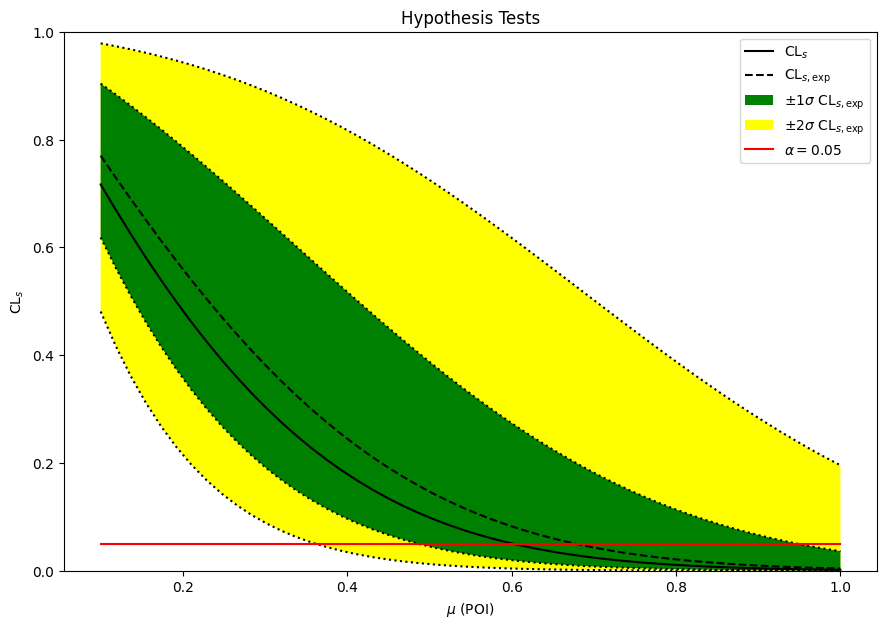

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results, ax=ax)